In [20]:
# importing modules

import pandas as pd

import numpy as np
import random

import matplotlib.pyplot as plt

from IPython.display import display, HTML
import seaborn as sns
%matplotlib inline
#%matplotlib nbagg

import time
import sys
from datetime import date, datetime

In [6]:
# Reading as pandas dataframe   
sales = pd.read_csv('./data/train.csv')
stores = pd.read_csv('./data/store.csv')

In [4]:
# displaying entries of sales and stores data
display(sales.head(3))
display(stores.head(3))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [7]:
# Merging sales and stores data to one table on 'Store'
sf = pd.merge(sales, stores, on='Store')
sf.head(3)
sf.shape

(1017209, 18)

In [8]:
sf['Open'] = sf['Open'].apply(lambda x: 0 if np.isnan(x) else x) # CHECK IT! shoud be removed or not?

sf['has_sales'] = sf['Sales'].apply(lambda x: x > 0)
sf['has_customers'] = sf['Customers'].apply(lambda x: x != 0)
sf.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,has_sales,has_customers
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,True,True
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,True,True
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,True,True


In [306]:
#Adding columns of week number, day and month
date_format = '%Y-%m-%d'
sf['_date'] = sf['Date'].apply(lambda x: datetime.strptime(x, date_format))
sf['week_of_month'] = sf['_date'].apply(lambda x: x.isocalendar()[1])
sf['month'] = sf['_date'].apply(lambda x: x.month)
sf['year'] = sf['_date'].apply(lambda x: x.isocalendar()[0])

In [299]:
sf.columns

Index([u'Store', u'DayOfWeek', u'Date', u'Sales', u'Customers', u'Open',
       u'Promo', u'StateHoliday', u'SchoolHoliday', u'StoreType',
       u'Assortment', u'CompetitionDistance', u'CompetitionOpenSinceMonth',
       u'CompetitionOpenSinceYear', u'Promo2', u'Promo2SinceWeek',
       u'Promo2SinceYear', u'PromoInterval', u'has_sales', u'has_customers',
       u'_date', u'week_of_month', u'month', u'year'],
      dtype='object')

In [10]:
display( sf.head(20))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,has_sales,has_customers
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,True,True
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,True,True
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,True,True
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,True,True
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,True,True
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,False,False
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,True,True
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,True,True
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,True,True
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,True,True


In [77]:
def saveFigure(name):
    
    plt.savefig((name), dpi = 300,bbox_inches='tight')

In [61]:
#Plotting "Mean Sales of Stores vs. (StoreType, AssortmentType)"

grouped = sf.groupby(['StoreType', 'Assortment'])['Sales'].mean()
grouped.head(10)


# plt.savefig('test.png', dpi = 300,bbox_inches='tight')

StoreType  Assortment
a          a              5398.858310
           c              6310.867032
b          a             10821.619806
           b              8553.931999
           c             17969.556263
c          a              5647.174314
           c              5805.782193
d          a              5317.885943
           c              5826.407660
Name: Sales, dtype: float64

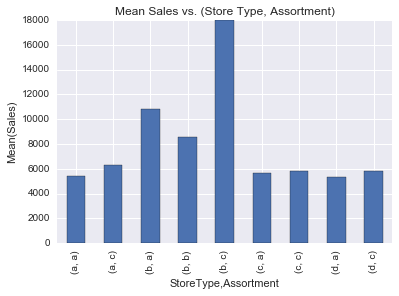

In [80]:
# dow = sf[(sf['Sales']!=0)].groupby(['DayOfWeek']).Sales.mean()
# dow.plot('bar')

meanSales_storTypeAssType = grouped.plot('bar')
meanSales_storTypeAssType.set(ylabel = 'Mean(Sales)', title = 'Mean Sales vs. (Store Type, Assortment)')
saveFigure('1_Mean Sales vs Store Type and Assortment')

# Summary:

In [161]:
# Mean Sales of indivdual Stores and Assorments
grouped2 = sf.groupby(['StoreType', 'Assortment']).agg({'Sales': np.mean})
grouped3 = grouped2.unstack(['StoreType', 'Assortment']).to_frame()

grouped4 = grouped3.reset_index([0,1,2]).drop('level_0', axis =1)
grouped4.columns = ['StoreType', 'Assortment', 'MeanSales']
grouped4.head()

# _, ax = plt.subplots(2,2)
# sf[(sf['Sales']!=0) & (sf['Store']==907)].boxplot(ax=ax[0][0], column='Sales', by='DayOfWeek')
# sf[(sf['Sales']!=0) & (sf['Store']==905)].boxplot(ax=ax[0][1], column='Sales', by='DayOfWeek')
# sf[(sf['Sales']!=0) & (sf['Store']==1025)].boxplot(ax=ax[1][0], column='Sales', by='DayOfWeek')
# sf[(sf['Sales']!=0) & (sf['Store']==974)].boxplot(ax=ax[1][1], column='Sales', by='DayOfWeek')

,StoreType,Assortment,MeanSales
0,a,a,5398.858310
1,a,c,6310.867032
2,b,a,10821.619806
3,b,b,8553.931999
4,b,c,17969.556263


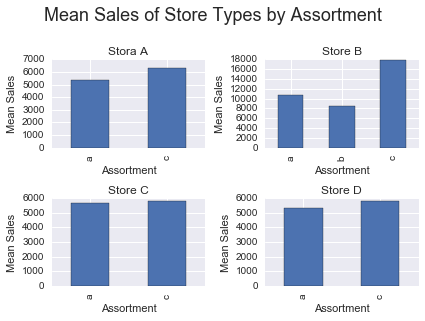

In [297]:
g5 =grouped4

g5 = dict(list(g5.groupby('StoreType')))

_, ax = plt.subplots(2,2)


g5['a'].plot( x = 'Assortment', y = 'MeanSales', kind = 'bar', ax=ax[0][0], legend = False, title = 'Stora A')
ax[0][0].set_ylabel('Mean Sales')
g5['b'].plot(x = 'Assortment', y = 'MeanSales', kind = 'bar', ax=ax[0][1], legend = False, title = 'Store B')
ax[0][1].set_ylabel('Mean Sales')
g5['c'].plot( x = 'Assortment',y = 'MeanSales', kind = 'bar', ax=ax[1][0], legend = False, title = 'Store C')
ax[1][0].set_ylabel('Mean Sales')
g5['d'].plot( x = 'Assortment',y = 'MeanSales', kind = 'bar', ax=ax[1][1], legend = False, title = 'Store D')
ax[1][1].set_ylabel('Mean Sales')

plt.suptitle('Mean Sales of Store Types by Assortment', fontsize = 18, y =1.1 )
plt.tight_layout()

saveFigure('2_Mean Sales of Store Types by Assortment')

# _, ax = plt.subplots(2,2)
# grouped4.plot(x = 'StoreType')
# for k,v in grouped4:
#     grouped4.plot(x = 'StoreType', data = grouped4[grouped4] )

In [84]:
# sns.lmplot(x='week_of_month', y='Sales', data=sf[(sf['Store']==974) & (sf['Sales'] !=0)], 
#            col='DayOfWeek', col_wrap=2);

In [85]:
# sns.lmplot(x='week_of_month', y='Sales', data=sf[(sf['Store']==907) & (sf['Sales'] !=0)], 
#            col='DayOfWeek', col_wrap=3, order=3);

In [298]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

In [333]:
hm = sf[['StoreType','CompetitionDistance', 'Sales']][0:10]

hm.pivot('StoreType')

ValueError: cannot label index with a null key

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''